In [35]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
import pandas as pd

# 1
df = pd.read_csv("/content/bank.csv")

# 2
df.info()
obj_cols = df.select_dtypes(include='object').columns
print(obj_cols)
for col in obj_cols:
    print(col, df[col].unique())
print(df.isnull().sum())

# 3
df_num = df.drop(columns=obj_cols)
df_num.to_csv("banknumericdata.csv", index=False)

# 4
df_new = pd.read_csv("banknumericdata.csv")
print(df_new.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'pou

In [37]:
import pandas as pd

df = pd.read_csv("/content/medical_students_dataset.csv")

df.info()
print(df.isnull().sum())

# 3 – imputations

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype != 'object':
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])

# 4 – duplicates
print(df.duplicated().sum())
df = df.drop_duplicates()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type        20000
BM

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

titanic = pd.read_csv("/content/Titanic-Dataset.csv")




In [39]:
sub = titanic[['Name','Pclass','Sex','Age','Fare','Survived']]
sub = sub[sub['Pclass'] == 1]

print(sub['Fare'].mean())
print(sub['Fare'].median())
print(sub['Fare'].max())
print(sub['Fare'].min())


84.1546875
60.287499999999994
512.3292
0.0


In [40]:
print(sub['Age'].isnull().sum())
sub = sub.dropna(subset=['Age'])


30


In [41]:
emb = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic = pd.concat([titanic, emb], axis=1)
titanic = titanic.drop(columns=['Embarked'])
print(titanic.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin  Embarked_C  Embarked_Q  Embarked_S  
0      0         A/5 21171   7.2500   NaN       False       False        True  
1      0          PC 17599  71.2833   C85        True       False       False  
2      0  STON/O2. 3101282   7.9250   NaN       False       False        True  


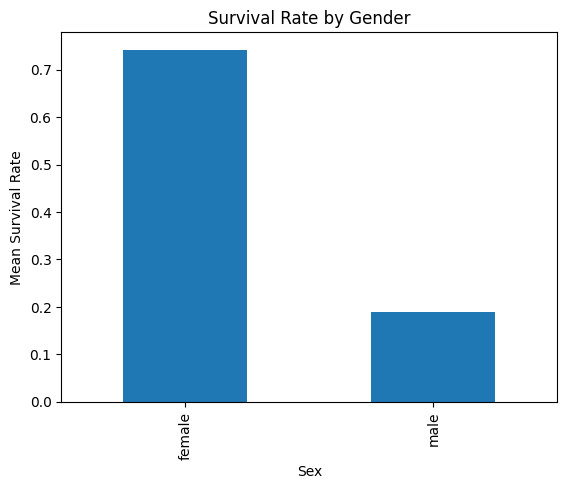

In [42]:


titanic.groupby('Sex')['Survived'].mean().plot(kind='bar')
plt.xlabel("Sex")
plt.ylabel("Mean Survival Rate")
plt.title("Survival Rate by Gender")
plt.show()



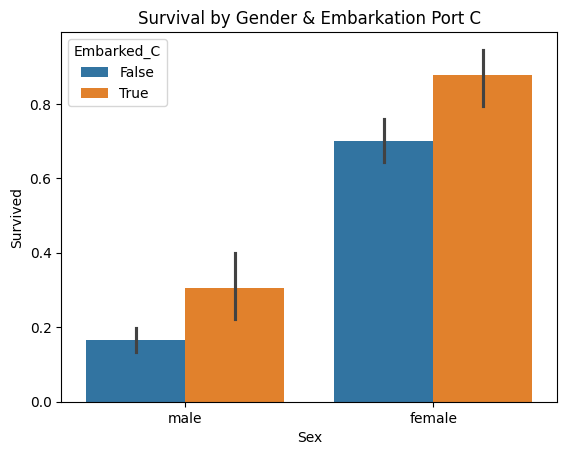

In [43]:
import seaborn as sns

sns.barplot(data=titanic, x='Sex', y='Survived', hue='Embarked_C')
plt.title("Survival by Gender & Embarkation Port C")
plt.show()